In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(
    './data.csv',
    parse_dates=['DateTime'])
data.head()

,DateTime,MentalHealthTweets,UV,CloudCover
0,2019-01-01 21:14:00,1.0,0.47,75.0
1,2019-01-01 21:20:00,0.0,0.47,75.0
2,2019-01-01 21:24:00,0.0,0.47,75.0
3,2019-01-01 21:30:00,0.0,0.47,90.0
4,2019-01-01 21:34:00,0.0,0.47,90.0


In [3]:
data = data[~data.index.duplicated()]

<Figure size 1440x360 with 0 Axes>

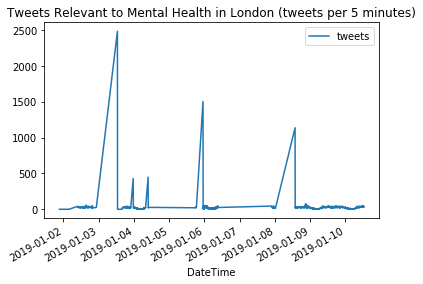

In [4]:
plt.figure(figsize=(20, 5))
data.plot(x='DateTime', y='MentalHealthTweets', label ="tweets") 
plt.title("Tweets Relevant to Mental Health in London (tweets per 5 minutes)")
plt.legend()
plt.show()

In [5]:
tweet_mean = float(data['MentalHealthTweets'].mean())
tweet_std = float(data['MentalHealthTweets'].std())

drop = []
ub = tweet_mean + 2 * tweet_std
lb = tweet_mean - 2 * tweet_std

for index, row in data.iterrows():
    tweets = float(row['MentalHealthTweets'])
    uv = row['UV']
    if tweets > ub or tweets < lb or tweets <= 0:
        drop.append(index)  
        
    if str(uv) == 'N':
        drop.append(index)  

data = data.drop(index=drop, axis=0)
data['MentalHealthTweets']=data['MentalHealthTweets'].astype(float)
data['UV']=data['UV'].astype(float)
data['CloudCover']=data['CloudCover'].astype(float)

<Figure size 1440x360 with 0 Axes>

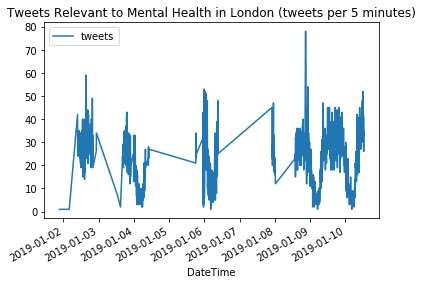

In [6]:
plt.figure(figsize=(20, 5))
data.plot(x='DateTime', y='MentalHealthTweets', label ="tweets") 
plt.title("Tweets Relevant to Mental Health in London (tweets per 5 minutes)")
plt.legend()
plt.show()

<Figure size 1440x360 with 0 Axes>

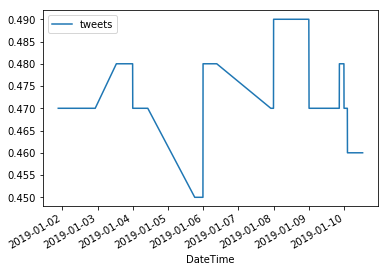

In [7]:
plt.figure(figsize=(20, 5))
data.plot(x='DateTime', y='UV', label ="tweets") 
plt.legend()
plt.show()

<Figure size 1440x360 with 0 Axes>

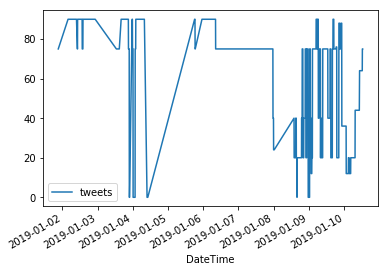

In [8]:
plt.figure(figsize=(20, 5))
data.plot(x='DateTime', y='CloudCover', label ="tweets") 
plt.legend()
plt.show()

In [9]:
for feature_name in data.columns[1:]:
        max_value = data[feature_name].max()
        min_value = data[feature_name].min()
        data[feature_name] = (data[feature_name] - min_value) / (max_value - min_value)
data.head()

,DateTime,MentalHealthTweets,UV,CloudCover
0,2019-01-01 21:14:00,0.000000,0.5,0.833333
17,2019-01-02 03:54:00,0.000000,0.5,1.000000
18,2019-01-02 09:35:00,0.532468,0.5,1.000000
19,2019-01-02 09:40:00,0.298701,0.5,1.000000
20,2019-01-02 10:15:00,0.389610,0.5,0.833333


In [10]:
data = data.sort_index(ascending=False)

In [11]:
drop = []

for index, row in data.iterrows():
    DT = str(row['DateTime'])
    time = [DT[-5], DT[-4]]

    if time[0] == '0' and time[1] == '0':
        pass
    else:
        drop.append(index)     

data = data.drop(drop, axis=0)

In [12]:
data.to_csv('save.csv', index=False)